In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
import keras
from keras.layers import BatchNormalization, Conv2D, SeparableConv2D, Activation, Dropout, MaxPool2D, Add, Dense
from tensorflow.keras.applications import Xception
import tensorflow as tf

In [ ]:
inp = keras.Input(shape=(224, 224, 3))
m = (Conv2D(64, (3, 3), padding='same', activation='relu'))(inp)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
mod = (Conv2D(128, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(512, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(512, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (Dropout(0.2))(m)
m = (keras.layers.GlobalMaxPooling2D())(m)
m = (Dense(1, activation='sigmoid'))(m)
model = keras.Model(inp, m)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd


from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/glaucoma2.csv")
glaucoma = np.array(data)

In [ ]:
x = []
y = []

choicelist = list(range(0, len(glaucoma)))

for i in range(len(glaucoma)):
  ind = np.random.choice(choicelist)
  filename = str(glaucoma[ind][0])

  filepath = "/content/gdrive/My Drive/ACRIMA/Images"

  img = np.array(Image.open(os.path.join(filepath, filename)).resize((224, 224), Image.ANTIALIAS)).reshape(224, 224, 3)
  img = img/255.0

  x.append(img)
  y.append(glaucoma[ind][1])

In [ ]:
x = np.array(x)
y = np.array(y)
x.shape

(705, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=1)

x_t, x_v, y_t, y_v = train_test_split(x_tr, y_tr, test_size=0.2, random_state=1)

In [ ]:
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer=Adadelta(lr=0.001), metrics=['accuracy'])
imgen = ImageDataGenerator(vertical_flip=True, horizontal_flip=True, rotation_range=20)
imgen.fit(x_t)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint(r'/content/gdrive/MyDrive/checkpoints/GC-Net.h5',
                            monitor='val_loss',save_best_only=True,save_weights_only = False)
history = model.fit_generator(imgen.flow(x_t, y_t, batch_size=16), epochs=35, steps_per_epoch=len(x_t)//16, validation_data=(x_v, y_v), validation_steps=len(x_v)//16, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/35
28/28 [==============================] - 348s 12s/step - loss: 0.2981 - accuracy: 0.9103 - val_loss: 0.3054 - val_accuracy: 0.9115
Epoch 2/35
28/28 [==============================] - 347s 12s/step - loss: 0.3024 - accuracy: 0.8874 - val_loss: 0.3010 - val_accuracy: 0.9115
Epoch 3/35
28/28 [==============================] - 343s 12s/step - loss: 0.3160 - accuracy: 0.8736 - val_loss: 0.2977 - val_accuracy: 0.9115
Epoch 4/35
28/28 [==============================] - 348s 12s/step - loss: 0.3060 - accuracy: 0.8920 - val_loss: 0.2946 - val_accuracy: 0.9115
Epoch 5/35
28/28 [==============================] - 347s 12s/step - loss: 0.2948 - accuracy: 0.8874 - val_loss: 0.2912 - val_accuracy: 0.9115
Epoch 6/35
28/28 [==============================] - 342s 12s/step - loss: 0.2920 - accuracy: 0.9149 - val_loss: 0.2871 - val_accuracy: 0.9115
Epoch 7/35
28/28 [==============================] - 347s 12s/step - loss: 0.2795 - accuracy: 0.9034 - val_loss: 0.2843 - val_accuracy: 0.9115
Epoch 

In [ ]:
loss, acc = model.evaluate(x_te, y_te)

5/5 [==============================] - 28s 5s/step - loss: 0.2726 - accuracy: 0.9291


In [ ]:
print(loss, acc)

0.2725681960582733 0.9290780425071716


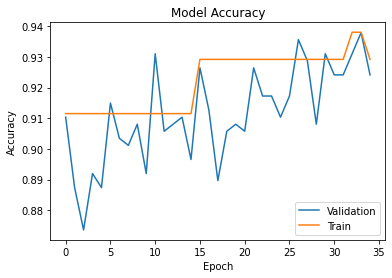

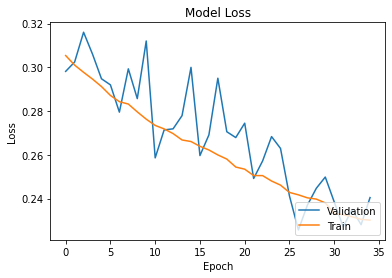

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation', 'Train'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation', 'Train'], loc='lower right')
plt.show()

In [ ]:
pred= np.round(model.predict(x_te, verbose=1, batch_size=16))
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_te, pred)
import seaborn as sb
print (conf_matrix)
sb.heatmap(conf_matrix, annot=True, fmt='.5g')

In [ ]:
from sklearn import metrics
print("The area under the ROC curve: ", metrics.roc_auc_score(y_te, pred))

The area under the ROC curve:  0.9319692563356875


In [ ]:
from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
print("sensitivity: ", sensitivity(y_te.astype('float32'), pred.astype('float32')))

In [ ]:
print("specificity: ", specificity(y_te.astype('float32'), pred.astype('float32')))

specificity:  tf.Tensor(63.0, shape=(), dtype=float32)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.90      0.91      0.90        77

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141



In [ ]:
fpr, tpr, tresholds = metrics.roc_curve(y_te, pred)

In [ ]:
auc_rf = metrics.auc(fpr, tpr)

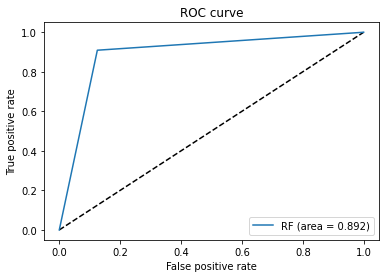

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()